**Author : Dharmin Solanki (ID: 201701198)**

Importing Libraries

In [0]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

**-------------------------------------------------------------------------------------------**

Mounting the Google Drive.

In [105]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**-------------------------------------------------------------------------------------------**

Loading the image-data Matrix.

In [0]:
images = h5py.File('/content/drive/My Drive/IE406- ML- Labs/Lab 6/faceimages.mat', 'r')

**####################################################################**

**Question 2 -** Mean subtracting the data and using it to obtain Sample Covariance Matrix .

> Importing image-data into an array.

In [0]:
imgData0 = np.array(images['data'][:])  
# "data" is a column in the faceimages.mat file.

> Reshaping the image and showing an example.

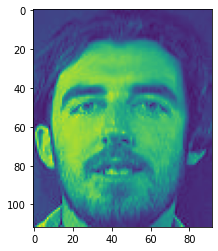

In [108]:
imgData = np.delete(imgData0, (112*92), 0)

temp=imgData.reshape((92,112,400))
temp2=temp[:,:,100]
img=temp2.T

plt.imshow(img)
plt.show()

> Subtracting mean values.

In [0]:
mean = np.mean(imgData, axis=1, keepdims=True)
imgData2 = imgData - mean

> Obtaing Sample Covariance Matrix.

In [110]:
covMatrix = np.cov(imgData2)

print('Dimensions of Covariance Matrix =', covMatrix.shape[0],'x', covMatrix.shape[0])

Dimensions of Covariance Matrix = 10304 x 10304


**####################################################################**

**Question 3 -** Eigenvalues and Eigenvectors of the Covariance Matrix.

> Calculating Eigenvectors and Eigenvalues and showing dimensions (i.e. shape).

In [111]:
eigenValues, eigenVectors = np.linalg.eigh(covMatrix)

print('Dimensions of the Eigenvectors =', eigenVectors.shape[0],'x', eigenVectors.shape[0])
print('Dimensions of the Eigenvalues  =', eigenValues.shape[0],'x', eigenValues.shape[0])

Dimensions of the Eigenvectors = 10304 x 10304
Dimensions of the Eigenvalues  = 10304 x 10304


**####################################################################**

**Question 4 -** Using the Eigenvectors as rows of the Transformation Matrix A.

> Generating the Transformation Matrix A.

In [0]:
index = eigenValues.argsort()[::-1]

eigenValues = eigenValues[index]
eigenVectors = eigenVectors[:, index]

A = eigenVectors

**####################################################################**

**Question 5 -** Obtaining 10304 * 10304 low dimensional representation of X.

In [113]:
X = imgData - mean

print('Dimensions of X =', X.shape[0],'x', X.shape[0])

Dimensions of X = 10304 x 10304


**####################################################################**

**Question 6 -** Reconstructing back any of the image by taking 50, 100, and 400 features of  Y; where Y = A•X.

> Calculating Y = A•X

In [114]:
Y = np.dot(A.T, X)

print('Dimensions of Y =', Y.shape[0],'x', Y.shape[0])

Dimensions of Y = 10304 x 10304


**-------------------------------------------------------------------------------------------**

> Reconstructing images by taking 50 features of Y.

>> Calculating X = A⁻¹•Y = A•Y using 50 features.

In [0]:
reconst_50 = np.dot(A[:,:50], Y[:50,100])

>> Compressing in dimension 112 x 92.

In [0]:
compress_50 = reconst_50.reshape((92,112))

>> Plotting reconstructed image.

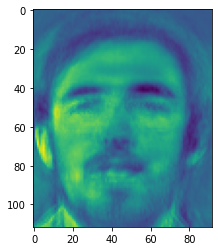

In [117]:
img_50 = compress_50.T

plt.imshow(img_50)
plt.show()

**-------------------------------------------------------------------------------------------**

> Reconstructing images by taking 100 features of Y.

>> Calculating X = A⁻¹•Y = A•Y using 100 features.

In [0]:
reconst_100 = np.dot(A[:,:100], Y[:100,100])

>> Compressing in dimension 112 x 92.

In [0]:
compress_100 = reconst_100.reshape((92,112))

>> Plotting reconstructed image.

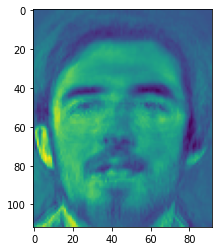

In [120]:
img_100 = compress_100.T

plt.imshow(img_100)
plt.show()

**-------------------------------------------------------------------------------------------**

> Reconstructing images by taking 400 features of Y.

>> Calculating X = A⁻¹•Y = A•Y using 400 features.

In [0]:
reconst_400 = np.dot(A[:,:400], Y[:400,100])

>> Compressing in dimension 112 x 92.

In [0]:
compress_400 = reconst_400.reshape((92,112))

>> Plotting reconstructed image.

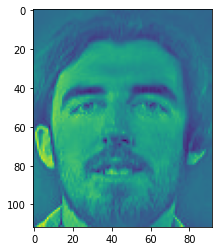

In [123]:
img_400 = compress_400.T

plt.imshow(img_400)
plt.show()

**####################################################################**

**Question 7 -** Calculating reconstruction error(l1 norm) for all the three cases.

> Case-1 : 50 features.

In [124]:
temp3 = abs(reconst_50 - X[:, 100])**2
temp4 = np.sum(temp3)
temp5 = temp4/len(reconst_50)
error_50 = np.sqrt(temp5)

print('Reconstruction Error =', error_50)

Reconstruction Error = 17.57302394061863


**-------------------------------------------------------------------------------------------**

> Case-2 : 100 features.

In [125]:
temp6 = abs(reconst_100 - X[:, 100])**2
temp7 = np.sum(temp6)
temp8 = temp7/len(reconst_100)
error_100 = np.sqrt(temp8)

print('Reconstruction Error =', error_100)

Reconstruction Error = 14.215397714791555


**-------------------------------------------------------------------------------------------**

> Case-3 : 400 features.

In [126]:
temp9 = abs(reconst_400 - X[:, 100])**2
temp10 = np.sum(temp9)
temp11 = temp10/len(reconst_400)
error_400 = np.sqrt(temp11)

print('Reconstruction Error =', error_400)

Reconstruction Error = 1.9670233563195864e-13


**-------------------------- END OF CODE --------------------------**